### Imports et initialisations

In [8]:
import numpy as np
#import os
#import tensorflow as tf
#import tensorflow.keras as keras
# Pour l'échantillonnage aléatoire
import random
#import re
#from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from clustertools import *

In [8]:
#répertoire dans lequel seront stockés les clusters, doit se terminer obligatoirement par /
cluster_dir = "clusters/1M_clusters/"
clean_dataset_file = "dataset/clean_1milliontweet.txt"
raw_dataset_file = "dataset/raw_1milliontweet.txt"

### Chargement des données en mémoire

In [2]:
with open(clean_dataset_file, "r") as file:
    lines = file.readlines()
    
clean_dataset = [line.split() for line in lines]

with open(raw_dataset_file, "r") as file:
    raw_dataset = file.readlines()

### Création des échantillons
Ne pas exécuter pour travailler avec toutes les données

In [ ]:
sample_size = 5000

idx_list = random.sample(range(len
                               (clean_dataset)), sample_size)
clean_dataset = [clean_dataset[i] for i in idx_list]
raw_dataset = [raw_dataset[i] for i in idx_list]

### Encodage du jeu de données

On charge le modèle depuis le disque

In [3]:
from gensim.models import KeyedVectors

In [4]:
model = KeyedVectors.load("model/w2vec_model_d300_1M")
dim = 300

In [5]:
# Encode un message
# msg : liste de chaînes de caractères correspondant aux mots du message
# model : le modèle utilisé pour l'encodage
# dim : la dimension des vecteurs mots dans ce modèle
# Renvoie un vecteur qui est la moyenne de tous les vecteurs correspondants aux mots du message
# Si aucun mot du message n'est dans le modèle, renvoie un vecteur de zéros.
def encode(msg, model, dim):
    return np.mean([model[word] for word in msg if word in model] or [np.zeros(dim)], axis = 0)

In [6]:
%%time
#encodage de l'échantillon pour créer le jeu de données
dataset_encoded = np.array([encode(msg, model, dim) for msg in clean_dataset])

CPU times: user 17 s, sys: 1.37 s, total: 18.4 s
Wall time: 18.5 s


### Visualisation du dataset

- On réalise une réduction de dimension afin de visualiser les données dans une grille en deux dimensions
- On utilise pour cela la méthode PCA

In [7]:
%%time

pca = PCA(n_components=2)

#On crée une version en deux dimensions de notre jeu de données
two_dim_dataset = pca.fit_transform(dataset_encoded)

CPU times: user 1min 11s, sys: 22.7 s, total: 1min 33s
Wall time: 45 s


In [9]:
#On utilise la matrice transposée de notre jeu de données pour pouvoir visualiser les données
b = two_dim_dataset.T

#Taille des figures
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

In [10]:
# Initialisation des variables globales pour le module clustertools
init_globals(clean_dataset, raw_dataset, dataset_encoded, two_dim_dataset, cluster_dir)

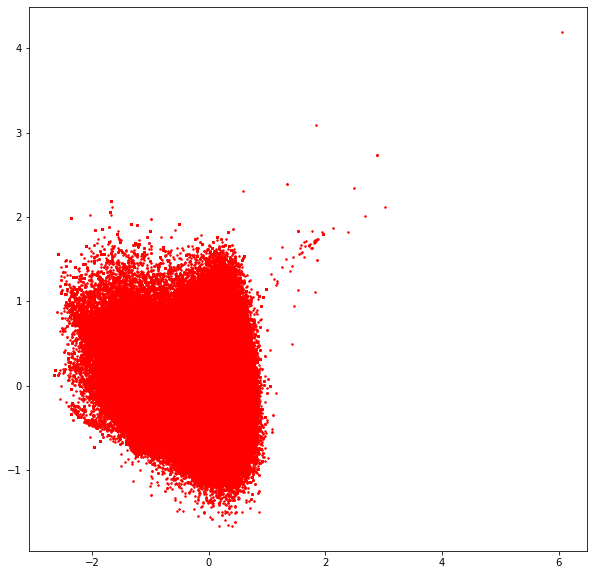

In [11]:
#Affichage des données
plt.plot(b[0], b[1], 'r.')
plt.show()

### Kmeans

Pour mémoire : méthode de calcul du nombre idéal de clusters avec la méthode du coude (elbow method)
```python
sum_of_squared_dist = []
for k in range(1, 30):
    km = KMeans(n_clusters=k)
    km.fit(dataset_encoded)
    sum_of_squared_dist.append(km.inertia_)
    
plt.plot(range(1, 60), sum_of_squared_dist, 'bx-')
plt.show
```

In [12]:
n_clust = 25

In [13]:
%%time
km_model = KMeans(n_clusters=n_clust, random_state=0)
kmeans = km_model.fit(dataset_encoded)

CPU times: user 36min, sys: 4min 5s, total: 40min 5s
Wall time: 6min 31s


In [14]:
%%time 
km_pred = kmeans.predict(dataset_encoded)

CPU times: user 3.72 s, sys: 1.15 s, total: 4.86 s
Wall time: 15.3 s


In [15]:
%%time
km_centers = c = [[r[0] for r in w2v.similar_by_vector(center)] for center in km_model.cluster_centers_]

CPU times: user 2.41 s, sys: 1.92 s, total: 4.33 s
Wall time: 3.1 s


cluster 0 : 55474 messages
Les 20 mots les plus fréquents : aller faire vouloir voir jour pouvoir falloir venir prendre envie devoir savoir bien finir passer mettre espérer dormir semaine soir 
Les mots les plus proches du centre : moldave chaumière kongossa faudrai apprenne automatisme msr trucs extérioriser marchai 

cluster 1 : 49659 messages
Les 20 mots les plus fréquents : france faire français macron pouvoir pays politique zemmour devoir président aller bien droite an vouloir maire gauche falloir voir grand 
Les mots les plus proches du centre : droitise naïvement ignorent contrario souvenez juré reviremer agitent adhèrent agissent 

cluster 2 : 26684 messages
Les 20 mots les plus fréquents : grité outrageous sachi asbonge chonjo marcha noup beaut moinsen boosie faisal poise envidier ayufs manifestingg poisé babieee babieeee hdh desperation 
Les mots les plus proches du centre : 슈가 perspectiva 서초출장업소 duplo xool montaubanvannes 𝘀𝗲𝗻𝘁 petita ailee tamite 

cluster 3 : 11162 messages

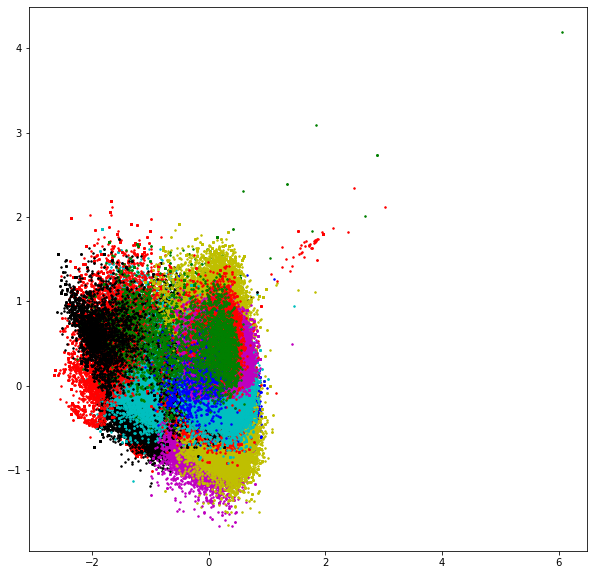

CPU times: user 9.03 s, sys: 6.78 s, total: 15.8 s
Wall time: 3min 11s


In [16]:
%%time
parse_results(km_pred, 'km', km_centers)